In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "AAPL"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 16)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2000-01-03 00:00:00+00:00,0.843077,0.999442,1.004464,0.907924,0.936384,535796800
2000-01-04 00:00:00+00:00,0.771997,0.915179,0.987723,0.903460,0.966518,512377600
2000-01-05 00:00:00+00:00,0.783294,0.928571,0.987165,0.919643,0.926339,778321600
2000-01-06 00:00:00+00:00,0.715509,0.848214,0.955357,0.848214,0.947545,767972800
2000-01-07 00:00:00+00:00,0.749402,0.888393,0.901786,0.852679,0.861607,460734400


In [4]:
df.shape

(6259, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6259 entries, 2000-01-03 00:00:00+00:00 to 2024-11-15 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  6259 non-null   float64
 1   (Close, AAPL)      6259 non-null   float64
 2   (High, AAPL)       6259 non-null   float64
 3   (Low, AAPL)        6259 non-null   float64
 4   (Open, AAPL)       6259 non-null   float64
 5   (Volume, AAPL)     6259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 342.3 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [7]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6.259000e+03
mean,40.321283,41.762269,42.177851,41.308244,41.733940,3.875510e+08
std,58.708668,58.984340,59.552555,58.354418,58.933013,3.839248e+08
min,0.197631,0.234286,0.235536,0.227143,0.231964,2.404830e+07
25%,1.996496,2.366785,2.401250,2.320714,2.380000,1.171988e+08
50%,13.698918,16.034643,16.229643,15.826429,16.065001,2.697744e+08
75%,43.247236,45.331251,45.762501,44.826250,45.400000,5.204696e+08
max,236.220108,236.479996,237.490005,234.449997,236.479996,7.421641e+09


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [11]:
df.to_csv("Apple.csv")

In [12]:
data01 = pd.read_csv("Apple.csv")

In [13]:
data01.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,0,2000-01-03 00:00:00+00:00,0.8430765271186829,0.9994419813156128,1.004464030265808,0.9079239964485168,0.9363840222358704,535796800
2,1,2000-01-04 00:00:00+00:00,0.7719966769218445,0.9151790142059326,0.9877229928970337,0.9034600257873535,0.966517984867096,512377600
3,2,2000-01-05 00:00:00+00:00,0.783293604850769,0.9285709857940674,0.9871649742126465,0.919642984867096,0.9263389706611633,778321600
4,3,2000-01-06 00:00:00+00:00,0.7155086994171143,0.8482139706611633,0.955357015132904,0.8482139706611633,0.9475449919700623,767972800


In [14]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

<ipython-input-15-8e9e58ec18af>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [16]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.999442,1.004464,0.907924,0.936384,535796800
1,0.915179,0.987723,0.903460,0.966518,512377600
2,0.928571,0.987165,0.919643,0.926339,778321600
3,0.848214,0.955357,0.848214,0.947545,767972800
4,0.888393,0.901786,0.852679,0.861607,460734400


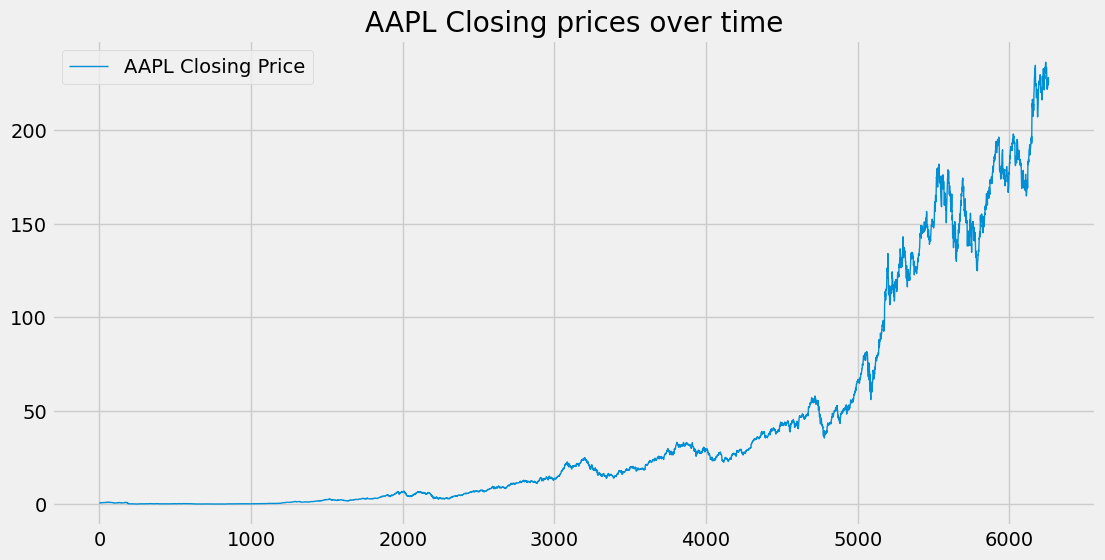

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

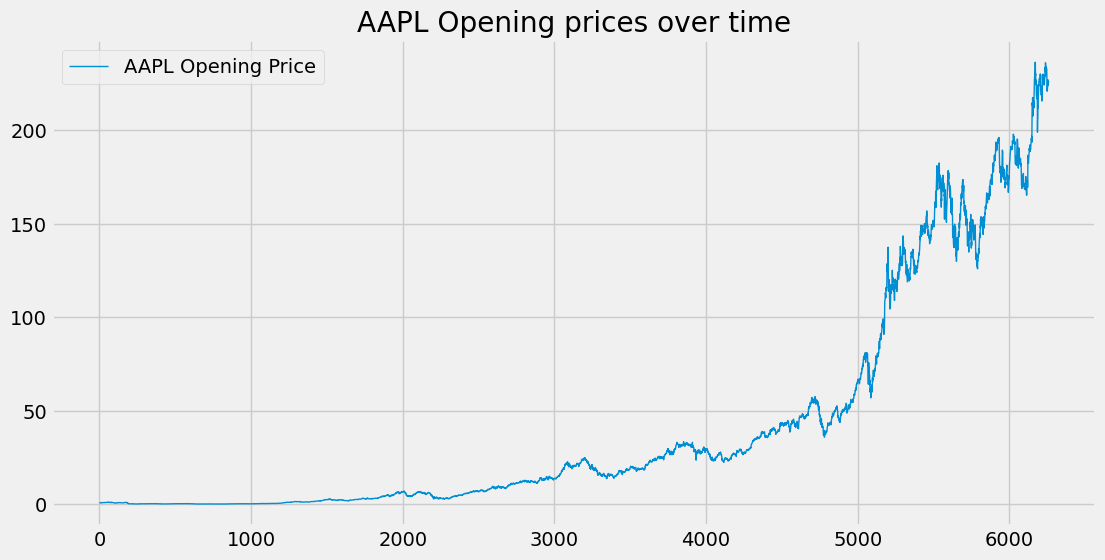

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

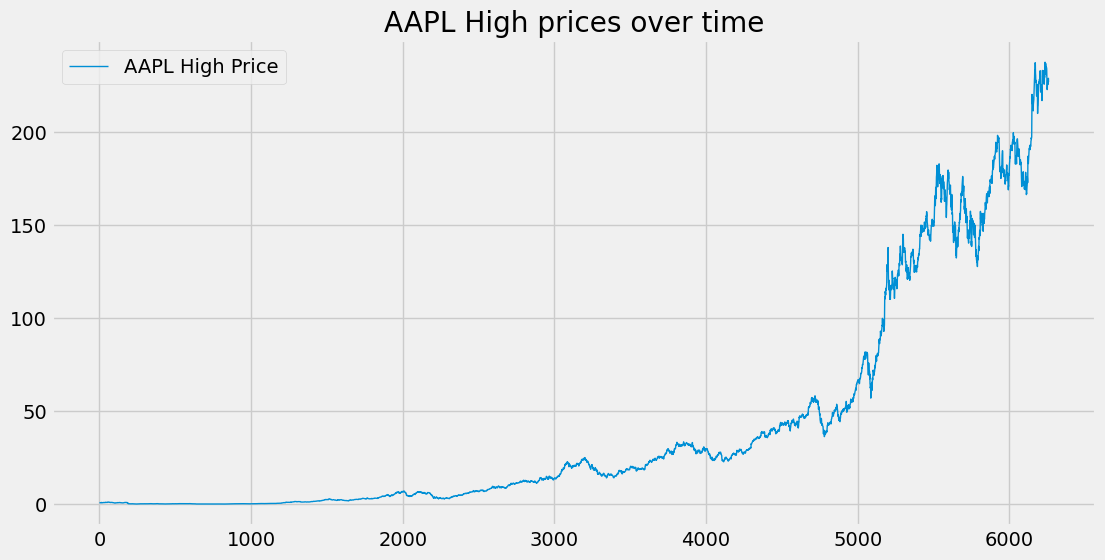

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

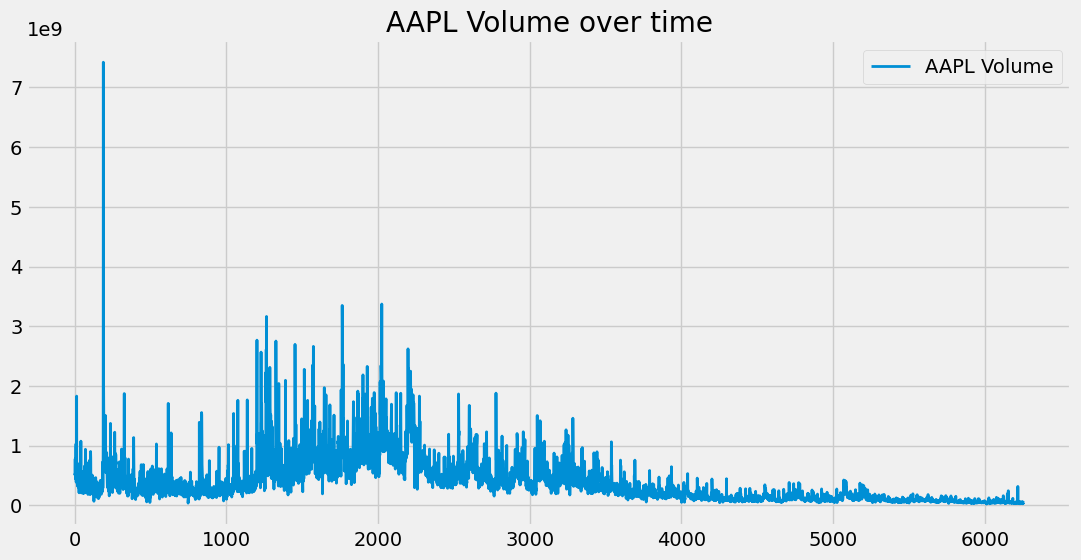

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [21]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [22]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [23]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [24]:
ma100 = df.Close.rolling(100).mean()

In [25]:
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6254,224.1609
6255,224.3283
6256,224.4981
6257,224.6896


In [26]:
ma200 = df.Close.rolling(200).mean()

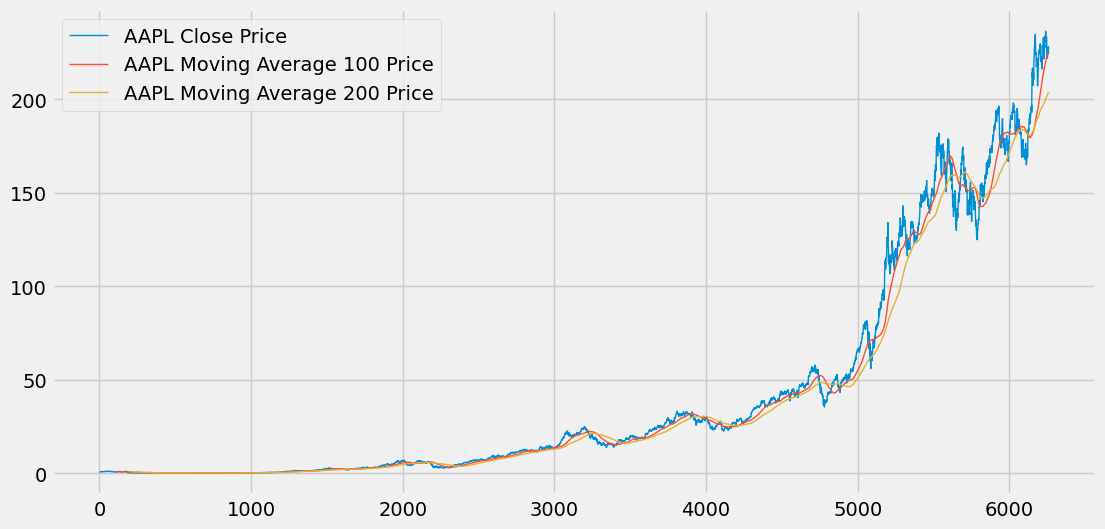

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [28]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [29]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

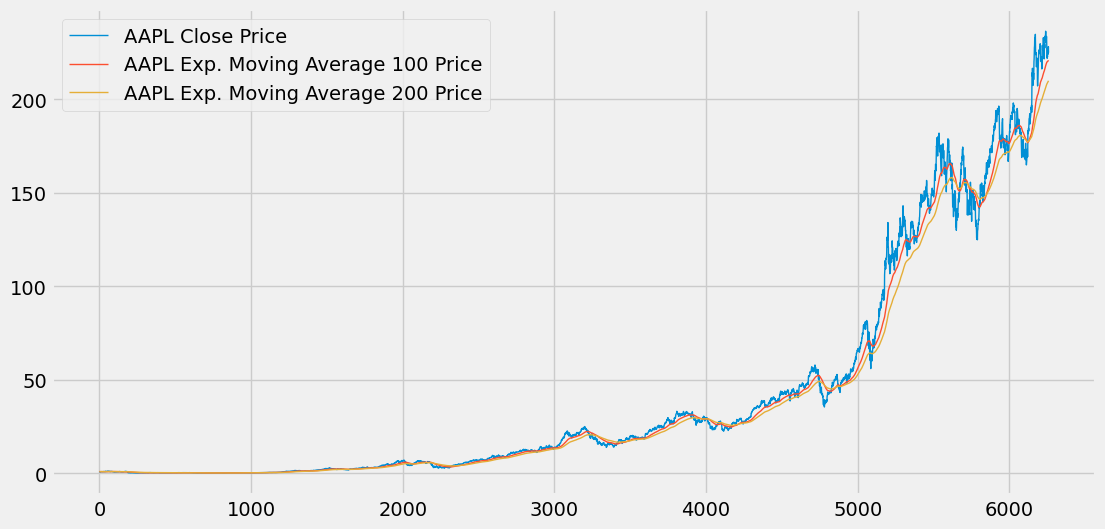

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [31]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [32]:
data_training.shape

(4381, 1)

In [33]:
data_testing.shape

(1878, 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [35]:
data_training_array = scaler.fit_transform(data_training)

In [36]:
data_training_array

array([[0.01972524],
       [0.01755299],
       [0.01789823],
       ...,
       [0.98433898],
       [0.97847416],
       [0.98118098]])

In [37]:
data_training_array.shape[0]

4381

In [38]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [39]:
x_train.shape

(4281, 100, 1)

In [40]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [41]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 305ms/step - loss: 0.0019
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - loss: 0.0018
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 80s 298ms/step - loss: 0.0019
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - loss: 0.0016
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0017
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - loss: 0.0018
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0017
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0018
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0017
Epoch 10/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0017
Epoch 11/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0019
Epoch 12/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0019
Epoch 13/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0017
Epoch 14/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0018
Epoch 15/50
134

In [45]:
past_100_days = data_training.tail(100)

In [47]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [48]:
final_df.head()

Ticker,AAPL
0,29.747499
1,29.777500
2,29.937500
3,29.812500
4,29.760000


In [49]:
input_data = scaler.fit_transform(final_df)

In [50]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [51]:
x_test.shape

(1878, 100, 1)

In [52]:
y_predicted = model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step


In [53]:
y_predicted.shape

(1878, 1)

In [54]:
scaler.scale_

array([0.00483717])

In [55]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

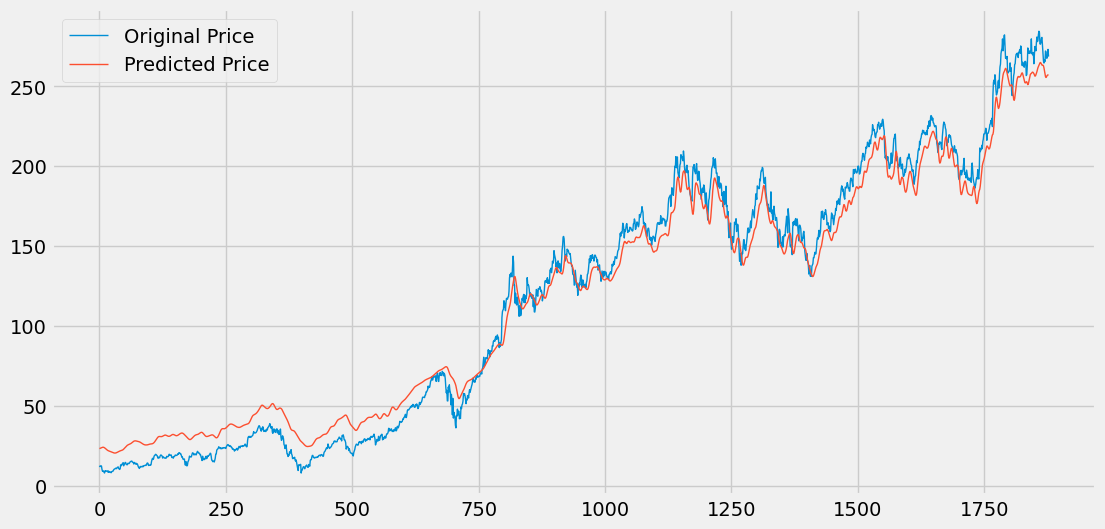

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [57]:
model.save('stock_dl_model.h5')